1. Configuration de l'Environnement et Importation des Bibliothèques
- Bibliothèques de Base et Visualisation
Cette section importe toutes les bibliothèques nécessaires pour l'analyse de données, la visualisation et le machine learning. L'organisation par catégories facilite la maintenance et la compréhension du code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Imports pour le machine learning classique
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, classification_report,
                           roc_curve, precision_recall_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


# Imports pour le traitement du déséquilibre
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Imports pour l'optimisation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

import pickle


In [2]:
# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("✅ Tous les packages ont été importés avec succès!")


✅ Tous les packages ont été importés avec succès!


2. Chargement et Exploration des Données {exploration}

2.1 Chargement du Dataset
Le chargement des données est la première étape critique qui détermine la suite de l'analyse. Une vérification immédiate permet d'identifier rapidement les problèmes potentiels.

In [3]:
# Chargement des données
print(" Chargement du dataset...")
data = pd.read_csv("fraude_bancaire_synthetique_final.csv")
print(f" Dataset chargé avec succès!")


 Chargement du dataset...
 Dataset chargé avec succès!


In [4]:
data

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.0,Mastercard,Houston,femelle,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,NaN,Mastercard,Houston,femelle,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.0,Visa,Houston,male,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.0,Mastercard,Orlando,femelle,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.0,Mastercard,Orlando,femelle,0.0
...,...,...,...,...,...,...,...,...,...
1015,48.973513,262962.250877,52.367001,3.428887e+06,8.0,Visa,Orlando,male,0.0
1016,42.298180,429413.188793,43.633980,3.255258e+06,2.0,NaN,Houston,male,0.0
1017,42.734031,531726.219363,37.934063,5.980733e+06,11.0,Mastercard,Houston,femelle,0.0
1018,44.454998,232283.191451,12.925355,5.094767e+06,12.0,Mastercard,Orlando,male,0.0


2.2 Analyse Descriptive Initiale
Cette section fournit une vue d'ensemble complète du dataset, essentielle pour comprendre la structure des données avant toute transformation.

In [5]:
print("\n📈 Informations générales:")
display(data.info())


📈 Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1003 non-null   float64
 1   salaire              1002 non-null   float64
 2   score_credit         998 non-null    float64
 3   montant_transaction  996 non-null    float64
 4   anciennete_compte    999 non-null    float64
 5   type_carte           997 non-null    object 
 6   region               1003 non-null   object 
 7   genre                997 non-null    object 
 8   fraude               982 non-null    float64
dtypes: float64(6), object(3)
memory usage: 71.8+ KB


None

In [6]:
print("\n📊 Statistiques descriptives:")
display(data.describe())


📊 Statistiques descriptives:


,age,salaire,score_credit,montant_transaction,anciennete_compte,fraude
count,1003.000000,1002.000000,998.000000,9.960000e+02,999.000000,982.000000
mean,40.408051,297164.636768,49.567810,5.088725e+06,9.655656,0.045825
std,7.805954,136089.166672,19.142124,2.843704e+06,4.815800,0.209212
min,24.000000,75000.000000,3.000000,2.500000e+04,1.000000,0.000000
25%,35.205528,195695.682449,36.335605,3.118899e+06,6.000000,0.000000
50%,40.452085,294562.124263,49.642099,4.982903e+06,10.000000,0.000000
75%,45.614974,391034.624076,62.795183,6.926266e+06,13.000000,0.000000
max,60.000000,715256.040844,99.000000,1.513330e+07,25.000000,1.000000


In [7]:
print("\n🎯 Distribution de la variable cible:")
fraude_counts = data['fraude'].value_counts()
fraude_pct = data['fraude'].value_counts(normalize=True) * 100

print(f"Non-fraude (0): {fraude_counts[0]:,} ({fraude_pct[0]:.2f}%)")
print(f"Fraude (1): {fraude_counts[1]:,} ({fraude_pct[1]:.2f}%)")

# Calcul du déséquilibre
imbalance_ratio = fraude_counts[0] / fraude_counts[1]
print(f" Ratio de déséquilibre: {imbalance_ratio:.1f}:1")
 


🎯 Distribution de la variable cible:
Non-fraude (0): 937 (95.42%)
Fraude (1): 45 (4.58%)
 Ratio de déséquilibre: 20.8:1


3. Visualisations Avancées pour l'Analyse Exploratoire

3.1 Création de Visualisations Interactives
Les visualisations interactives avec Plotly offrent une meilleure compréhension des données et permettent une exploration plus approfondie.

In [8]:
# Fonction pour créer des visualisations avancées
def create_advanced_visualizations(df):
    """Crée des visualisations avancées pour l'EDA"""
    
    # Configuration de la figure principale
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=[
            'Distribution de la Variable Cible',
            'Distribution des Montants par Classe',
            'Corrélation des Variables Numériques',
            'Distribution par Âge et Fraude',
            'Score de Crédit vs Fraude',
            'Ancienneté Compte vs Fraude'
        ],
        specs=[[{"type": "pie"}, {"type": "box"}],
               [{"type": "heatmap", "colspan": 2}, None],
               [{"type": "histogram"}, {"type": "violin"}]]
    )
    
    # 1. Distribution de la variable cible (Pie chart)
    fraude_counts = df['fraude'].value_counts()
    fig.add_trace(
        go.Pie(labels=['Non-Fraude', 'Fraude'], 
               values=[fraude_counts[0], fraude_counts[1]],
               hole=0.4,
               marker_colors=['#2E8B57', '#DC143C']),
        row=1, col=1
    )
    
    # 2. Box plot des montants par classe
    for i, classe in enumerate([0, 1]):
        data_classe = df[df['fraude'] == classe]['montant_transaction']
        fig.add_trace(
            go.Box(y=data_classe, 
                   name=f'Classe {classe}',
                   marker_color='#2E8B57' if classe == 0 else '#DC143C'),
            row=1, col=2
        )
    
    # 4. Distribution par âge
    fig.add_trace(
        go.Histogram(x=df[df['fraude']==0]['age'], 
                     name='Non-Fraude', 
                     opacity=0.7,
                     marker_color='#2E8B57'),
        row=3, col=1
    )
    fig.add_trace(
        go.Histogram(x=df[df['fraude']==1]['age'], 
                     name='Fraude', 
                     opacity=0.7,
                     marker_color='#DC143C'),
        row=3, col=1
    )
    
    # 5. Violin plot score crédit
    for i, classe in enumerate([0, 1]):
        data_classe = df[df['fraude'] == classe]['score_credit']
        fig.add_trace(
            go.Violin(y=data_classe, 
                      name=f'Score Crédit - Classe {classe}',
                      side='positive' if classe == 0 else 'negative',
                      marker_color='#2E8B57' if classe == 0 else '#DC143C'),
            row=3, col=2
        )
    
    fig.update_layout(height=1200, showlegend=True, 
                      title_text="📊 Analyse Exploratoire Complète - Détection de Fraude")
    fig.show()


In [9]:
# Exécution des visualisations avancées
print("🎨 Génération des visualisations avancées...")
create_advanced_visualizations(data)

🎨 Génération des visualisations avancées...


3.2 Analyse des Variables Catégorielles
L'analyse des variables catégorielles révèle des patterns importants dans la distribution des fraudes selon différentes caractéristiques.


 Distribution de GENRE:
fraude     0.0   1.0
genre               
femelle  96.67  3.33
male     93.97  6.03


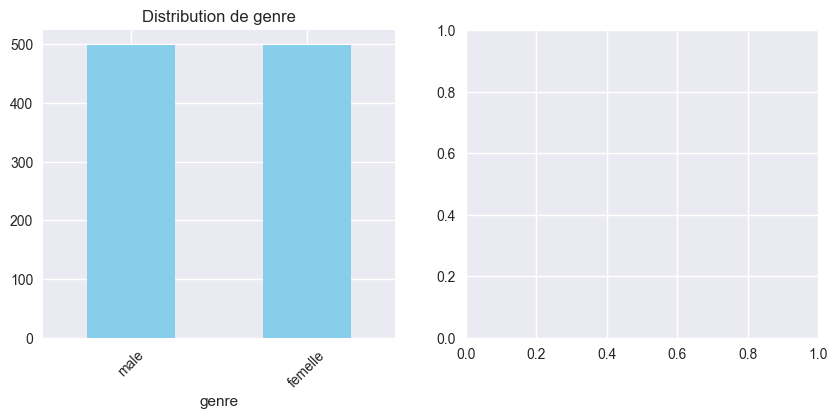

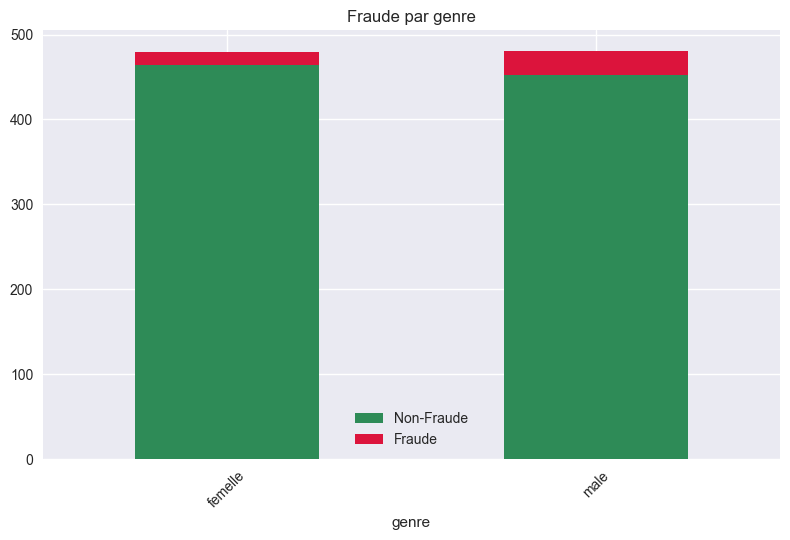


 Distribution de REGION:
fraude     0.0   1.0
region              
Houston  95.42  4.58
Miami    95.83  4.17
Orlando  95.13  4.87


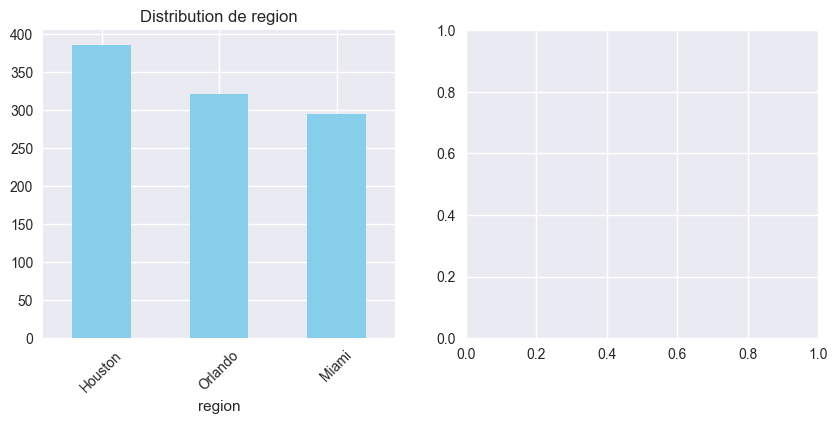

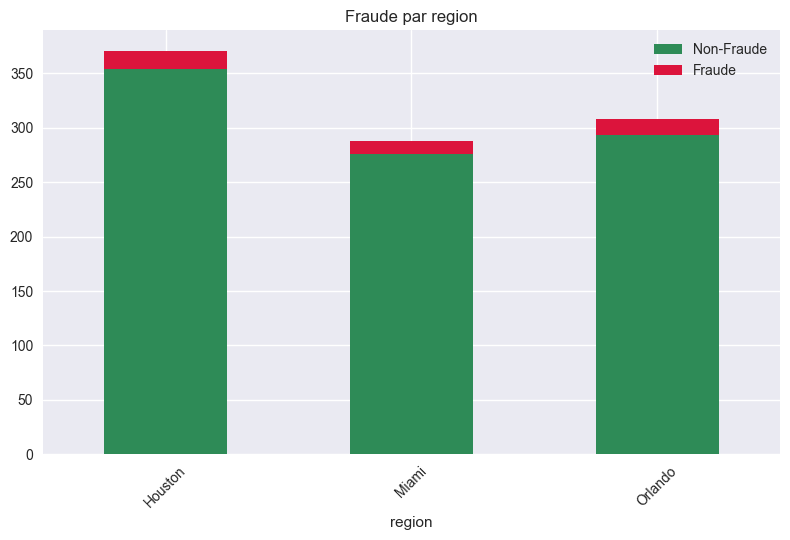


 Distribution de TYPE_CARTE:
fraude        0.0   1.0
type_carte             
Mastercard  95.07  4.93
Visa        95.67  4.33


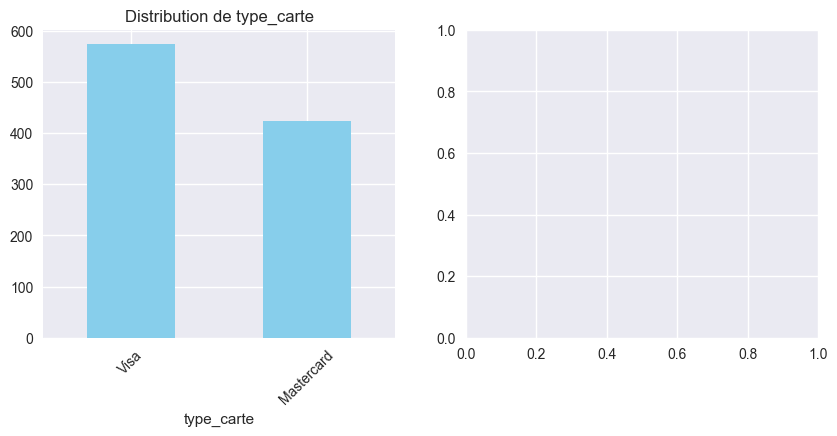

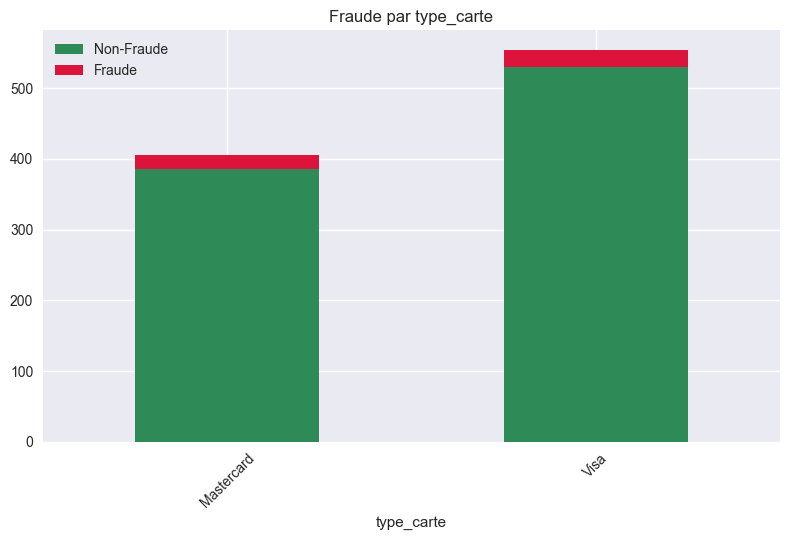

In [10]:
categorical_cols = ['genre', 'region', 'type_carte']

for col in categorical_cols:
    if col in data.columns:
        print(f"\n Distribution de {col.upper()}:")
        crosstab = pd.crosstab(data[col], data['fraude'], normalize='index') * 100
        print(crosstab.round(2))

         # Visualisation
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        data[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution de {col}')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 2, 2)
        crosstab_abs = pd.crosstab(data[col], data['fraude'])
        crosstab_abs.plot(kind='bar', stacked=True, color=['#2E8B57', '#DC143C'])
        plt.title(f'Fraude par {col}')
        plt.legend(['Non-Fraude', 'Fraude'])
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

In [11]:
# Analyse statistique
chi2_stat = pd.crosstab(data[col], data['fraude'])
print(f"📈 Observations pour {col}:")
print(f"   - Modalité avec le plus de fraudes: {crosstab[1].idxmax()} ({crosstab[1].max():.1f}%)")
print(f"   - Modalité avec le moins de fraudes: {crosstab[1].idxmin()} ({crosstab[1].min():.1f}%)")

📈 Observations pour type_carte:
   - Modalité avec le plus de fraudes: Mastercard (4.9%)
   - Modalité avec le moins de fraudes: Visa (4.3%)


3.3 Analyse de Corrélation
L'analyse de corrélation identifie les relations entre variables et guide la sélection des features les plus pertinentes.

C:\Users\HP\AppData\Local\Temp\ipykernel_10512\47777747.py:18: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.

c:\Users\HP\Documents\dockerFom\machinelearning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.



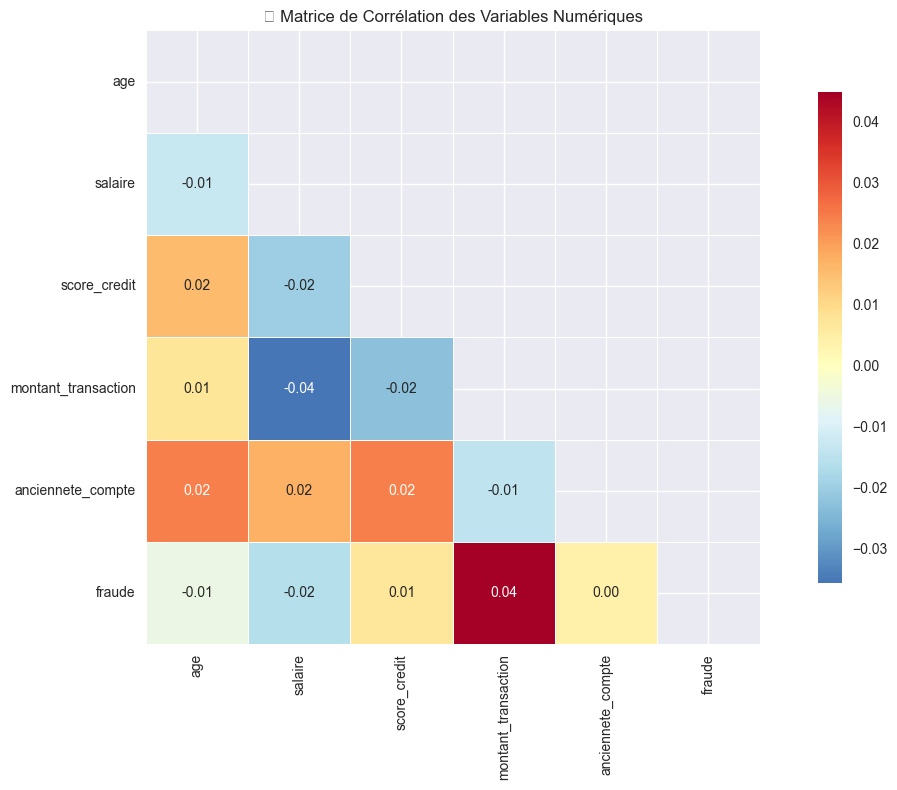

In [12]:
# Sélection des variables numériques
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = data[numeric_cols].corr()

# Heatmap de corrélation avec annotations
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8},
            linewidths=0.5)
plt.title('🔗 Matrice de Corrélation des Variables Numériques')
plt.tight_layout()
plt.show()

In [13]:
 # Analyse des corrélations avec la variable cible
if 'fraude' in corr_matrix.columns:
        print("\n🎯 Corrélations avec la variable FRAUDE:")
        fraude_corr = corr_matrix['fraude'].abs().sort_values(ascending=False)
        
        print("┌" + "─"*25 + "┬" + "─"*10 + "┐")
        print("│ Variable              │ Corrél.  │")
        print("├" + "─"*25 + "┼" + "─"*10 + "┤")
        
        for var, corr in fraude_corr.items():
            if var != 'fraude':
                corr_strength = "🔴" if abs(corr) > 0.5 else "🟡" if abs(corr) > 0.3 else "🟢"
                print(f"│ {var:<21} │ {corr_strength} {corr:>5.3f} │")
        
        print("└" + "─"*25 + "┴" + "─"*10 + "┘")
        
        # Identification des corrélations fortes
        strong_corr = fraude_corr[fraude_corr > 0.3]
        if len(strong_corr) > 1:  # Exclure la variable fraude elle-même
            print(f"\n🔍 Variables les plus corrélées (|r| > 0.3): {len(strong_corr)-1}")


🎯 Corrélations avec la variable FRAUDE:
┌─────────────────────────┬──────────┐
│ Variable              │ Corrél.  │
├─────────────────────────┼──────────┤
│ montant_transaction   │ 🟢 0.045 │
│ salaire               │ 🟢 0.016 │
│ score_credit          │ 🟢 0.007 │
│ age                   │ 🟢 0.006 │
│ anciennete_compte     │ 🟢 0.004 │
└─────────────────────────┴──────────┘


4. Préparation et Nettoyage des Données

4.1 Gestion des Valeurs Manquantes
Une approche sophistiquée pour traiter les valeurs manquantes selon le type de variable et la distribution des données.

In [14]:
def handle_missing_values_advanced(data):
   
    print("\n" + "="*60)
    print("🔧 GESTION DES VALEURS MANQUANTES")
    print("="*60)
    
    data_processed = data.copy()
    
    # Diagnostic initial
    missing_summary = data_processed.isnull().sum()
    total_missing = missing_summary.sum()
    
    if total_missing > 0:
        print(f"⚠️  {total_missing} valeurs manquantes détectées dans {len(missing_summary[missing_summary > 0])} colonnes")
        print("\nDétail par colonne:")
        print("┌" + "─"*20 + "┬" + "─"*10 + "┬" + "─"*8 + "┐")
        print("│ Colonne              │ Manq.    │ %       │")
        print("├" + "─"*20 + "┼" + "─"*10 + "┼" + "─"*8 + "┤")
        
        for col, count in missing_summary[missing_summary > 0].items():
            pct = (count / len(data_processed)) * 100
            print(f"│ {col:<18} │ {count:>8} │ {pct:>6.1f}% │")
        
        print("└" + "─"*20 + "┴" + "─"*10 + "┴" + "─"*8 + "┘")
        
        # Traitement adaptatif par colonne
        for col in data_processed.columns:
            if data_processed[col].isnull().sum() > 0:
                if data_processed[col].dtype in ['float64', 'int64']:
                    # Variables numériques: stratégie basée sur la distribution
                    fill_value = data_processed[col].mean()
                    data_processed[col].fillna(fill_value, inplace=True)
                    print(f"✅ {col}: remplacé par la moyenne ({fill_value:.2f})")
                    
                else:
                    # Variables catégorielles: mode ou valeur par défaut
                    mode_values = data_processed[col].mode()
                    if not mode_values.empty:
                        fill_value = mode_values.iloc[0]
                        data_processed[col].fillna(fill_value, inplace=True)
                        print(f"✅ {col}: remplacé par le mode ('{fill_value}')")
                    else:
                        data_processed[col].fillna('Unknown', inplace=True)
                        print(f"✅ {col}: remplacé par 'Unknown'")
    else:
        print("✅ Aucune valeur manquante détectée")
    
    return data_processed
# Application du traitement des valeurs manquantes
data = handle_missing_values_advanced(data)


🔧 GESTION DES VALEURS MANQUANTES
⚠️  203 valeurs manquantes détectées dans 9 colonnes

Détail par colonne:
┌────────────────────┬──────────┬────────┐
│ Colonne              │ Manq.    │ %       │
├────────────────────┼──────────┼────────┤
│ age                │       17 │    1.7% │
│ salaire            │       18 │    1.8% │
│ score_credit       │       22 │    2.2% │
│ montant_transaction │       24 │    2.4% │
│ anciennete_compte  │       21 │    2.1% │
│ type_carte         │       23 │    2.3% │
│ region             │       17 │    1.7% │
│ genre              │       23 │    2.3% │
│ fraude             │       38 │    3.7% │
└────────────────────┴──────────┴────────┘
✅ age: remplacé par la moyenne (40.41)
✅ salaire: remplacé par la moyenne (297164.64)
✅ score_credit: remplacé par la moyenne (49.57)
✅ montant_transaction: remplacé par la moyenne (5088725.02)
✅ anciennete_compte: remplacé par la moyenne (9.66)
✅ type_carte: remplacé par le mode ('Visa')
✅ region: remplacé par le mode

C:\Users\HP\AppData\Local\Temp\ipykernel_10512\2835877514.py:32: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\HP\AppData\Local\Temp\ipykernel_10512\2835877514.py:40: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

4.2 Traitement Spécialisé par Colonne
Traitement ciblé pour chaque colonne selon sa nature et son importance dans l'analyse.

In [15]:
def apply_specialized_filling(data):
    print("\n Application de stratégies spécialisées par colonne...")
    
    # Traitement de l'âge
    if 'age' in data.columns and data['age'].isnull().sum() > 0:
        age_mean = data['age'].mean()
        data['age'].fillna(age_mean, inplace=True)
        print(f"✅ Age: {data['age'].isnull().sum()} → 0 (moyenne: {age_mean:.1f})")
    
    # Traitement du salaire
    if 'salaire' in data.columns and data['salaire'].isnull().sum() > 0:
        salaire_mean = data['salaire'].mean()
        data.fillna({'salaire': salaire_mean}, inplace=True)
        print(f"✅ Salaire: rempli avec la moyenne ({salaire_mean:.0f})")
    
    # Traitement du score de crédit
    if 'score_credit' in data.columns and data['score_credit'].isnull().sum() > 0:
        score_mean = data['score_credit'].mean()
        data.fillna({'score_credit': score_mean}, inplace=True)
        print(f"✅ Score crédit: rempli avec la moyenne ({score_mean:.0f})")
    
    return data

def fill_remaining_missing_values(data, columns_to_process):
    print("\n Traitement des valeurs manquantes restantes...")
    
    for col in columns_to_process:
        if col not in data.columns:
            print(f"  Colonne '{col}' non trouvée")
            continue
            
        missing_count = data[col].isnull().sum()
        if missing_count == 0:
            continue
            
        if data[col].dtype in ['float64', 'int64']:
            # Variables numériques
            mean_val = data[col].mean()
            data[col] = data[col].fillna(mean_val)
            print(f"✅ {col}: {missing_count} valeurs → moyenne ({mean_val:.2f})")
            
        elif data[col].dtype == 'object' or data[col].dtype.name == 'category':
            # Variables catégorielles
            mode_values = data[col].mode()
            if not mode_values.empty:
                mode_val = mode_values.iloc[0]
                data[col] = data[col].fillna(mode_val)
                print(f"✅ {col}: {missing_count} valeurs → mode ('{mode_val}')")
    
    return data

# Application des traitements
data = apply_specialized_filling(data)

# Traitement des colonnes spécifiques
columns_to_fill = ['montant_transaction', 'anciennete_compte', 'type_carte', 'region', 'genre']
data = fill_remaining_missing_values(data, columns_to_fill)

# Vérification finale
print(f"\n📊 Vérification finale: {data.isnull().sum().sum()} valeurs manquantes restantes")


 Application de stratégies spécialisées par colonne...

 Traitement des valeurs manquantes restantes...

📊 Vérification finale: 0 valeurs manquantes restantes


4.3 Gestion des Doublons
Identification et suppression des observations dupliquées pour améliorer la qualité des données.

In [16]:
 # Comptage initial
initial_count = len(data)
duplicate_count = data.duplicated().sum()

print(f"📊 Observations initiales: {initial_count:,}")
print(f"🔄 Doublons détectés: {duplicate_count:,}")

📊 Observations initiales: 1,020
🔄 Doublons détectés: 10


In [17]:
  # Suppression des doublons
data_cleaned = data.drop_duplicates()
final_count = len(data_cleaned)
removed_count = initial_count - final_count
        
print(f"✅ Doublons supprimés: {removed_count:,}")
print(f"📊 Observations finales: {final_count:,}")

✅ Doublons supprimés: 10
📊 Observations finales: 1,010


5. Encodage des Variables Catégorielles

5.1 Stratégie d'Encodage Intelligente
Application d'une stratégie d'encodage adaptée selon le nombre de modalités et la nature de chaque variable.

In [18]:
def encode_categorical_variables(data, categorical_columns):
    
    data_encoded = data.copy()
    encoders_dict = {}
    total_rows = len(data_encoded)
    
    for col in categorical_columns:
            
        if data_encoded[col].dtype == 'object' or data_encoded[col].dtype.name == 'category':
            unique_values = data_encoded[col].dropna().unique()
            n_unique = len(unique_values)
            
            print(f"\n Traitement de '{col}':")
            print(f"   - Modalités uniques: {n_unique}")
            print(f"   - Type d'encodage: ", end="")
            
            if n_unique <= 2:
                # Label Encoding pour les variables binaires
                le = LabelEncoder()
                data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))
                encoders_dict[col] = {'type': 'label', 'encoder': le}
                print("Label Encoding (binaire)")
                
            else:
                # Frequency Encoding pour les variables multi-classes
                value_counts = data_encoded[col].value_counts()
                freq_map = {k: total_rows / v for k, v in value_counts.items()}
                data_encoded[col] = data_encoded[col].map(freq_map)
                encoders_dict[col] = {'type': 'frequency', 'mapping': freq_map}
                print("Frequency Encoding (multi-classes)")
            
            # Affichage des premiers exemples de transformation
            print(f"   - Exemple de transformation: {list(unique_values[:3])} → {list(data_encoded[col].unique()[:3])}")
    
    return data_encoded, encoders_dict

# Application de l'encodage
categorical_columns = ['genre', 'region', 'type_carte']
data, encoding_info = encode_categorical_variables(data, categorical_columns)


 Traitement de 'genre':
   - Modalités uniques: 2
   - Type d'encodage: Label Encoding (binaire)
   - Exemple de transformation: ['femelle', 'male'] → [np.int64(0), np.int64(1)]

 Traitement de 'region':
   - Modalités uniques: 3
   - Type d'encodage: Frequency Encoding (multi-classes)
   - Exemple de transformation: ['Houston', 'Orlando', 'Miami'] → [np.float64(2.531017369727047), np.float64(3.1677018633540373), np.float64(3.457627118644068)]

 Traitement de 'type_carte':
   - Modalités uniques: 2
   - Type d'encodage: Label Encoding (binaire)
   - Exemple de transformation: ['Mastercard', 'Visa'] → [np.int64(0), np.int64(1)]


6. Traitement de la Variable Cible et Équilibrage des Classes

6.1 Imputation de la Variable Cible
Utilisation d'un modèle KNN pour prédire les valeurs manquantes de la variable cible de manière cohérente.

In [19]:
# Avant d'utiliser KNN Imputer, vous devez préparer vos données
# 1. Séparer les données complètes et incomplètes
complete_data = data.dropna(subset=['fraude'])
incomplete_data = data[data['fraude'].isna()]

# 2. Définir features et target
features_incomplete = complete_data.drop('fraude', axis=1)
target_complete = complete_data['fraude']

# 3. Vérifier que la cible est bien catégorielle pour KNN Classifier
if target_complete.dtype == 'float':
    target_complete = target_complete.round().astype(int)



In [20]:
# 4. Maintenant nous allons pouvoir utiliser KNN
print("Entraînement du modèle KNN pour l'imputation...")
knn_imputer = KNeighborsClassifier(n_neighbors=5)
knn_imputer.fit(features_incomplete.values, target_complete.values.ravel())

Entraînement du modèle KNN pour l'imputation...


KNeighborsClassifier()

In [21]:
#Prédiction des valeurs manquantes de la target
predicted_values = knn_imputer.predict(features_incomplete)

c:\Users\HP\Documents\dockerFom\machinelearning\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [22]:
# Réinjection des prédictions
data_completed = data.copy()
# On suppose que la colonne cible est 'fraude'
target_column = 'fraude'
# On suppose que les valeurs à prédire sont celles manquantes dans la colonne 'fraude'
missing_mask = data_completed[target_column].isna()
missing_count = missing_mask.sum()
# On suppose que predicted_values contient autant de valeurs que de lignes manquantes
data_completed.loc[missing_mask, target_column] = predicted_values

print(f"✅ {missing_count:,} valeurs prédites et réinjectées")

✅ 0 valeurs prédites et réinjectées


In [23]:
 # Vérification de la distribution après imputation
print(f"\n📈 Distribution après imputation:")
final_counts = data_completed[target_column].value_counts()
final_pct = data_completed[target_column].value_counts(normalize=True) * 100
print(f"Non-fraude (0): {final_counts[0]:,} ({final_pct[0]:.2f}%)")
print(f"Fraude (1): {final_counts[1]:,} ({final_pct[1]:.2f}%)")


📈 Distribution après imputation:
Non-fraude (0): 937 (91.86%)
Fraude (1): 45 (4.41%)


6.2 Équilibrage des Classes avec SMOTE
Application de SMOTE (Synthetic Minority Oversampling Technique) pour créer un dataset équilibré.

In [24]:
# Séparation des features et de la cible
X = data.drop(target_column, axis=1)
y = data[target_column].astype(int)
    
# Application de SMOTE
print("\n🔄 Application de SMOTE...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
    
# Création du nouveau DataFrame
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced[target_column] = y_resampled
    
# État final
final_counts = data_balanced[target_column].value_counts()
final_ratio = final_counts[0] / final_counts[1]
    
print(f"✅ Distribution après SMOTE:")
print(f"   Non-fraude (0): {final_counts[0]:,}")
print(f"   Fraude (1): {final_counts[1]:,}")
print(f"   Ratio: {final_ratio:.1f}:1")


🔄 Application de SMOTE...
✅ Distribution après SMOTE:
   Non-fraude (0): 975
   Fraude (1): 975
   Ratio: 1.0:1


7. Traitement des Valeurs Aberrantes

7.1 Détection et Traitement des Outliers
Méthode IQR (Interquartile Range) pour identifier et traiter les valeurs aberrantes de manière conservative.

In [25]:
#1 - Traitements des valeurs aberrantes
# Fonction pour detecter et remplacer les valeurs aberrantes avec les Bounds
def detect_and_treat_outliers(data, method='iqr', factor=1.5):
    for col in data.select_dtypes(include=["number"]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

data = detect_and_treat_outliers(data)
data

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.000000,0.0,2.531017,0.0,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,9.655656,0.0,2.531017,0.0,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.000000,1.0,2.531017,1.0,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.000000,0.0,3.167702,0.0,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.000000,0.0,3.167702,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1015,48.973513,262962.250877,52.367001,3.428887e+06,8.000000,1.0,3.167702,1.0,0.0
1016,42.298180,429413.188793,43.633980,3.255258e+06,2.000000,1.0,2.531017,1.0,0.0
1017,42.734031,531726.219363,37.934063,5.980733e+06,11.000000,0.0,2.531017,0.0,0.0
1018,44.454998,232283.191451,12.925355,5.094767e+06,12.000000,0.0,3.167702,1.0,0.0


In [26]:

data_balanced = detect_and_treat_outliers(data_balanced)
# Conversion finale du type de la variable cible
data_balanced['fraude'] = data_balanced['fraude'].astype(int)

In [27]:
X = data.drop(["fraude"],axis=1).values
X

array([[4.95488940e+01, 1.83659046e+05, 4.82285787e+01, ...,
        0.00000000e+00, 2.53101737e+00, 0.00000000e+00],
       [4.49526654e+01, 3.29732599e+05, 6.75730970e+01, ...,
        0.00000000e+00, 2.53101737e+00, 0.00000000e+00],
       [4.16599104e+01, 7.50000000e+04, 7.75594867e+01, ...,
        1.00000000e+00, 2.53101737e+00, 1.00000000e+00],
       ...,
       [4.27340314e+01, 5.31726219e+05, 3.79340630e+01, ...,
        0.00000000e+00, 2.53101737e+00, 0.00000000e+00],
       [4.44549978e+01, 2.32283191e+05, 1.29253552e+01, ...,
        0.00000000e+00, 3.16770186e+00, 1.00000000e+00],
       [2.49576927e+01, 3.91660636e+05, 8.93751462e+01, ...,
        1.00000000e+00, 3.16770186e+00, 0.00000000e+00]])

In [28]:
y = data[["fraude"]].values
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

8. Préparation pour la Modélisation

8.1 Séparation des Features et de la Cible
Préparation des données pour l'entraînement des modèles de machine learning.

In [29]:
def prepare_modeling_data(df, target_column='fraude', test_size=0.25, random_state=42):
    
    
    # Séparation features/target
    X = df.drop([target_column], axis=1).values
    y = df[target_column].values
    
    print(f"📊 Dimensions des données:")
    print(f"   Features (X): {X.shape}")
    print(f"   Target (y): {y.shape}")
    print(f"   Distribution de y: {np.bincount(y)}")
    
    # Division train/test avec stratification
    print(f"\n Division train/test (test_size={test_size})...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state, 
        stratify=y
    )
    
    print(f"✅ Jeux de données créés:")
    print(f"   Training: {X_train.shape[0]:,} observations")
    print(f"   Test: {X_test.shape[0]:,} observations")
    
    # Normalisation des features
    print(f"\n Normalisation des features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"✅ Normalisation appliquée:")
    print(f"   Moyenne des features (train): {X_train_scaled.mean():.3f}")
    print(f"   Écart-type des features (train): {X_train_scaled.std():.3f}")
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Préparation des données pour la modélisation
X_train, X_test, y_train, y_test, feature_scaler = prepare_modeling_data(data_balanced)

📊 Dimensions des données:
   Features (X): (1950, 8)
   Target (y): (1950,)
   Distribution de y: [975 975]

 Division train/test (test_size=0.25)...
✅ Jeux de données créés:
   Training: 1,462 observations
   Test: 488 observations

 Normalisation des features...
✅ Normalisation appliquée:
   Moyenne des features (train): -0.000
   Écart-type des features (train): 1.000


9. Entraînement et Évaluation des Modèles

9.1 Configuration des Modèles
Définition d'une suite de modèles de machine learning avec leurs paramètres par défaut.

In [30]:
#nous avons decider de choisir 4 models et le meilleurs sera utiliser
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
]

In [31]:
model_names = [ "Gradient Boosting", "Random Forest", "Logistic Regression", "KNeighborsClassifier",]

train_results = []
test_results = []

9.2 Fonction d'Évaluation Complète
Évaluation systématique des modèles avec métriques complètes et visualisations.

***LogisticRegression()****

**** TRAINING ****

🔄 Entraînement en cours...

📊 PERFORMANCE SUR LE JEU D'ENTRAÎNEMENT
--------------------------------------------------
🎯 Accuracy: 0.6471 (64.71%)

📋 Rapport de classification:
              precision    recall  f1-score   support

  Non-Fraude       0.66      0.60      0.63       731
      Fraude       0.63      0.70      0.66       731

    accuracy                           0.65      1462
   macro avg       0.65      0.65      0.65      1462
weighted avg       0.65      0.65      0.65      1462


🔄 Validation croisée (10 plis)...
📈 Scores CV: Moyenne = 0.6464 (±0.0829)
📊 Détail des scores: [0.6259 0.5986 0.6918 0.6712 0.7055 0.5685 0.6849 0.6233 0.637  0.6575]

📊 PERFORMANCE SUR LE JEU DE TEST
--------------------------------------------------
🎯 Accuracy: 0.6291 (62.91%)

📋 Rapport de classification:
              precision    recall  f1-score   support

  Non-Fraude       0.64      0.58      0.61       244
      Fraude       0.62    

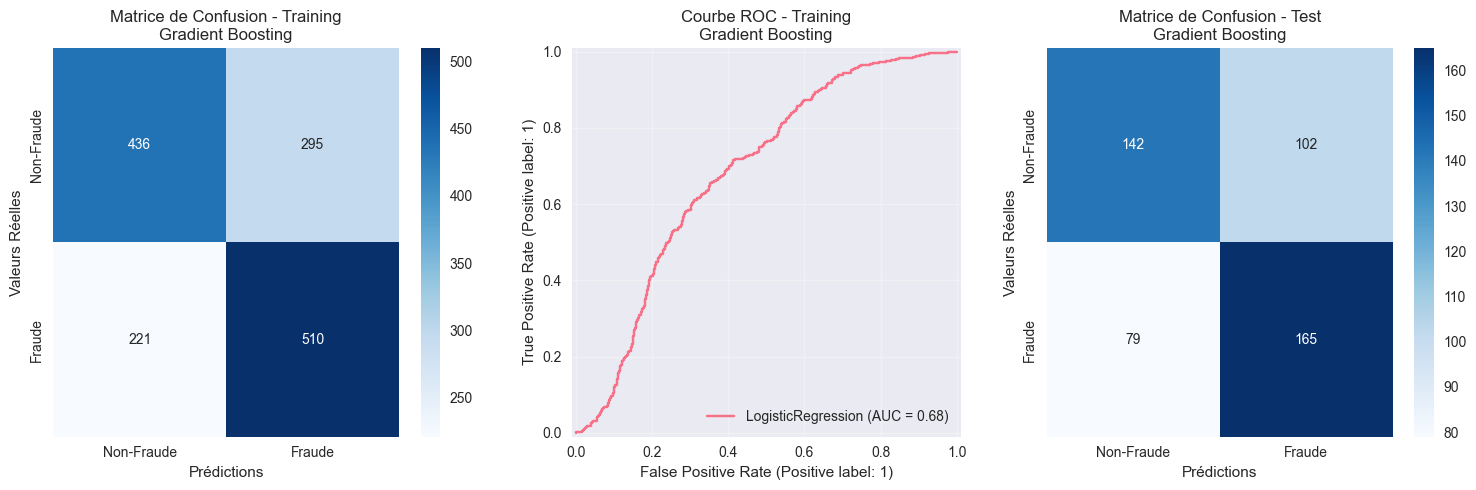


🔄 Validation croisée sur le test (10 plis)...
📈 Scores CV Test: Moyenne = 0.6045 (±0.1993)


<Figure size 800x600 with 0 Axes>

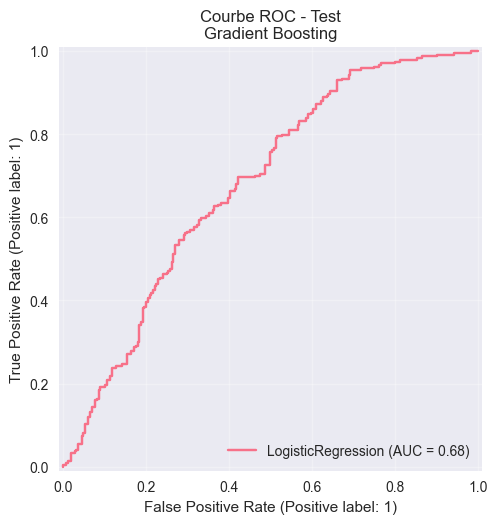

***RandomForestClassifier()****

**** TRAINING ****

🔄 Entraînement en cours...

📊 PERFORMANCE SUR LE JEU D'ENTRAÎNEMENT
--------------------------------------------------
🎯 Accuracy: 1.0000 (100.00%)

📋 Rapport de classification:
              precision    recall  f1-score   support

  Non-Fraude       1.00      1.00      1.00       731
      Fraude       1.00      1.00      1.00       731

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462


🔄 Validation croisée (10 plis)...
📈 Scores CV: Moyenne = 0.9610 (±0.0345)
📊 Détail des scores: [0.9524 0.932  0.9863 0.9863 0.9521 0.9452 0.9658 0.9589 0.9795 0.9521]

📊 PERFORMANCE SUR LE JEU DE TEST
--------------------------------------------------
🎯 Accuracy: 0.9693 (96.93%)

📋 Rapport de classification:
              precision    recall  f1-score   support

  Non-Fraude       0.98      0.96      0.97       244
      Fraude       0.9

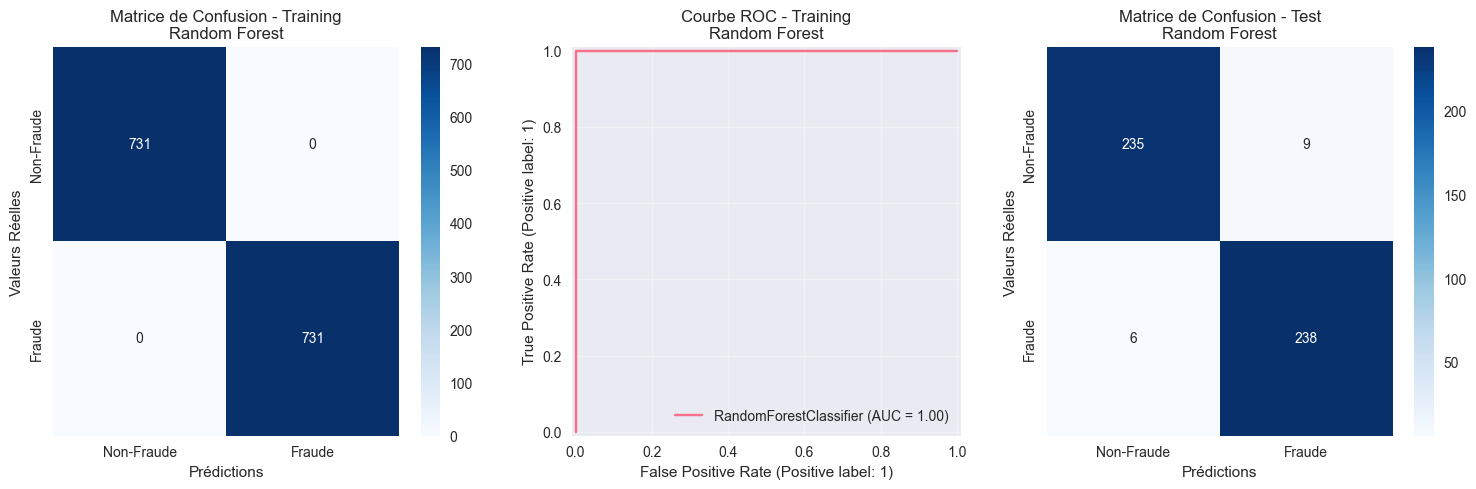


🔄 Validation croisée sur le test (10 plis)...
📈 Scores CV Test: Moyenne = 0.9099 (±0.1310)


<Figure size 800x600 with 0 Axes>

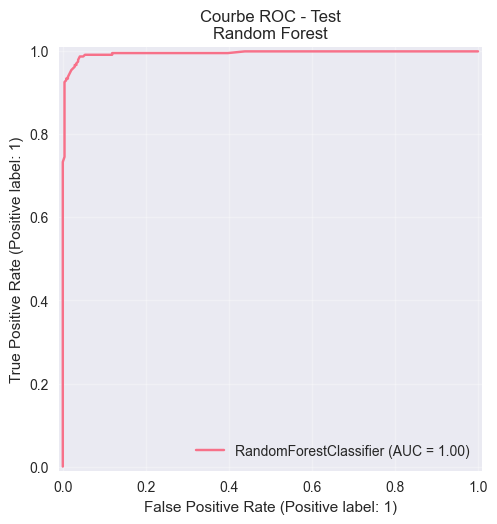

***GradientBoostingClassifier()****

**** TRAINING ****

🔄 Entraînement en cours...

📊 PERFORMANCE SUR LE JEU D'ENTRAÎNEMENT
--------------------------------------------------
🎯 Accuracy: 0.9665 (96.65%)

📋 Rapport de classification:
              precision    recall  f1-score   support

  Non-Fraude       0.95      0.98      0.97       731
      Fraude       0.98      0.95      0.97       731

    accuracy                           0.97      1462
   macro avg       0.97      0.97      0.97      1462
weighted avg       0.97      0.97      0.97      1462


🔄 Validation croisée (10 plis)...
📈 Scores CV: Moyenne = 0.9282 (±0.0493)
📊 Détail des scores: [0.8912 0.932  0.9795 0.9521 0.9384 0.9384 0.9178 0.9247 0.9041 0.9041]

📊 PERFORMANCE SUR LE JEU DE TEST
--------------------------------------------------
🎯 Accuracy: 0.9385 (93.85%)

📋 Rapport de classification:
              precision    recall  f1-score   support

  Non-Fraude       0.95      0.93      0.94       244
      Fraude       

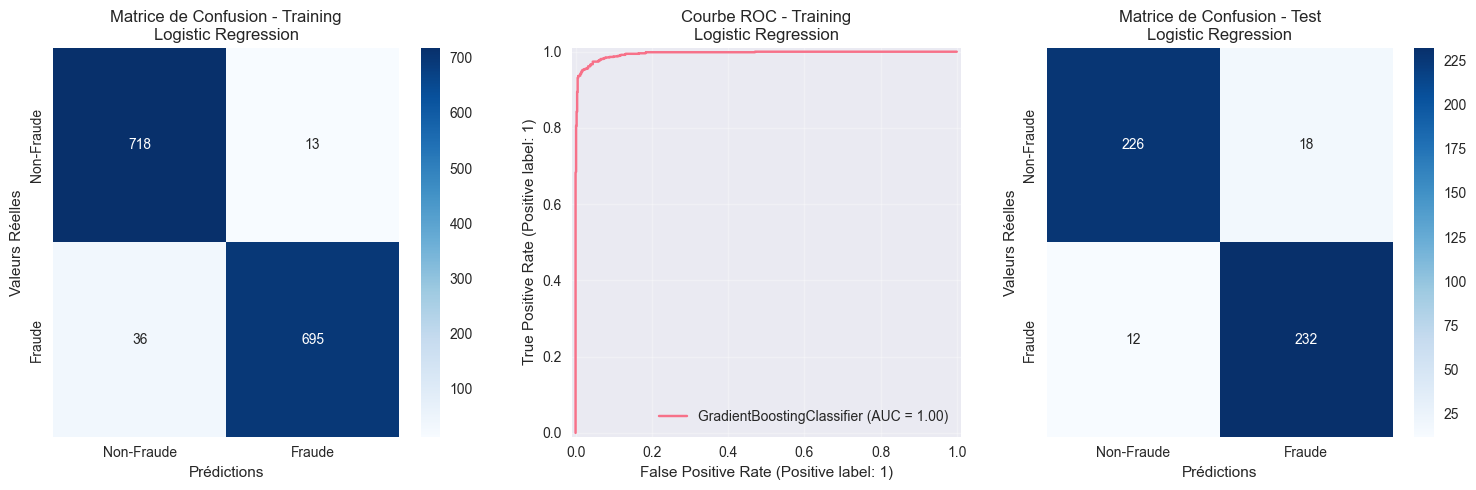


🔄 Validation croisée sur le test (10 plis)...
📈 Scores CV Test: Moyenne = 0.8977 (±0.1475)


<Figure size 800x600 with 0 Axes>

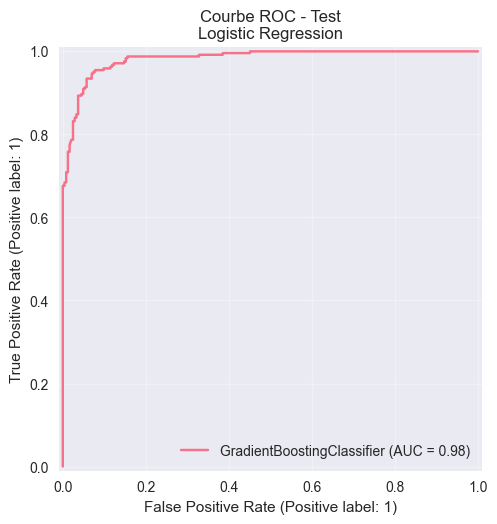

***KNeighborsClassifier()****

**** TRAINING ****

🔄 Entraînement en cours...

📊 PERFORMANCE SUR LE JEU D'ENTRAÎNEMENT
--------------------------------------------------
🎯 Accuracy: 0.8659 (86.59%)

📋 Rapport de classification:
              precision    recall  f1-score   support

  Non-Fraude       0.98      0.75      0.85       731
      Fraude       0.79      0.99      0.88       731

    accuracy                           0.87      1462
   macro avg       0.89      0.87      0.86      1462
weighted avg       0.89      0.87      0.86      1462


🔄 Validation croisée (10 plis)...
📈 Scores CV: Moyenne = 0.7907 (±0.0665)
📊 Détail des scores: [0.8095 0.8299 0.8014 0.7945 0.8493 0.7466 0.7808 0.7329 0.7808 0.7808]

📊 PERFORMANCE SUR LE JEU DE TEST
--------------------------------------------------
🎯 Accuracy: 0.8115 (81.15%)

📋 Rapport de classification:
              precision    recall  f1-score   support

  Non-Fraude       0.97      0.64      0.77       244
      Fraude       0.73  

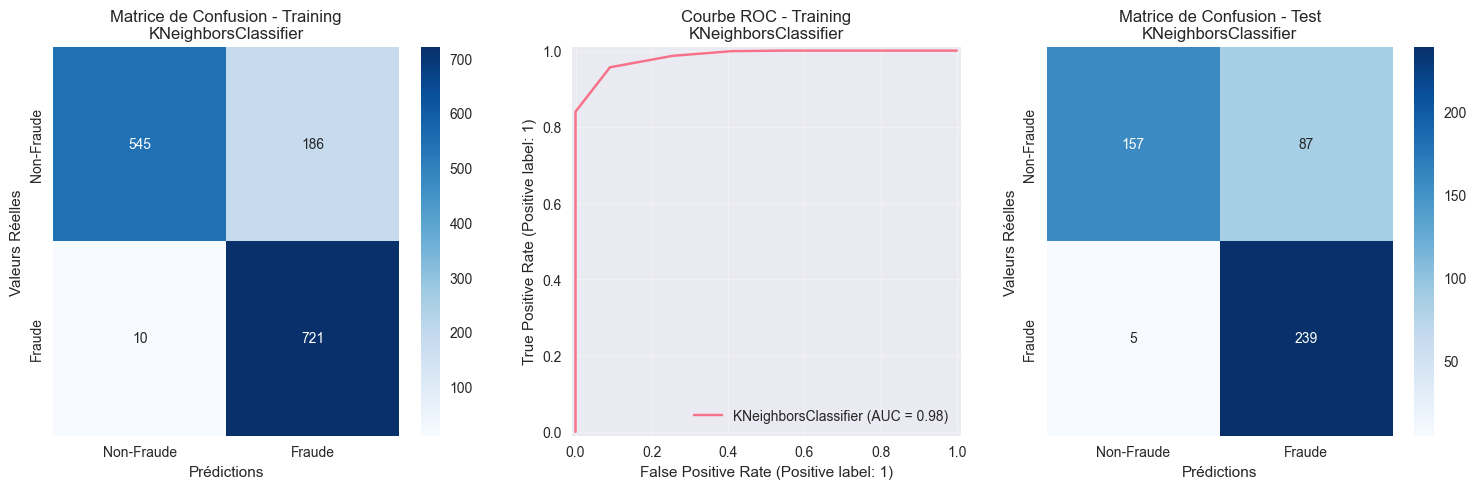


🔄 Validation croisée sur le test (10 plis)...
📈 Scores CV Test: Moyenne = 0.6988 (±0.0880)


<Figure size 800x600 with 0 Axes>

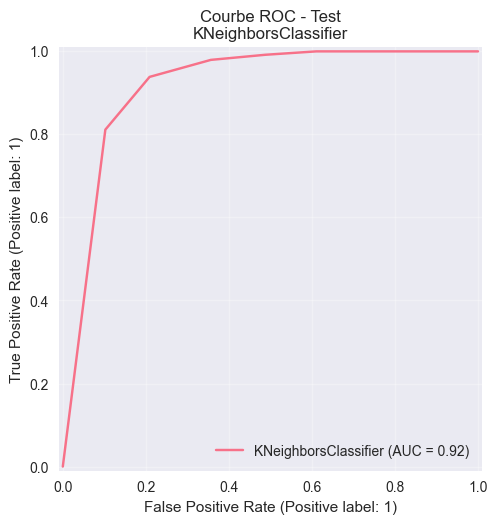

In [32]:
def evaluate_model_comprehensive(model, model_name, X_train, X_test, y_train, y_test, cv_folds=10):

    # Entraînement du modèle
    print(f"***{model}****\n")
    print("**** TRAINING ****\n")
    print("🔄 Entraînement en cours...")
    model.fit(X_train, y_train)
    
    # === ÉVALUATION SUR LE JEU D'ENTRAÎNEMENT ===
    print(f"\n📊 PERFORMANCE SUR LE JEU D'ENTRAÎNEMENT")
    print("-" * 50)
    
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    print(f"🎯 Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
    print(f"\n📋 Rapport de classification:")
    print(classification_report(y_train, y_train_pred, target_names=['Non-Fraude', 'Fraude']))
    
    # Matrice de confusion - Training
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    cm_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Fraude', 'Fraude'],
                yticklabels=['Non-Fraude', 'Fraude'])
    plt.title(f'Matrice de Confusion - Training\n{model_name}')
    plt.ylabel('Valeurs Réelles')
    plt.xlabel('Prédictions')
    
    # Validation croisée
    print(f"\n🔄 Validation croisée ({cv_folds} plis)...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
    print(f"📈 Scores CV: Moyenne = {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
    print(f"📊 Détail des scores: {cv_scores.round(4)}")
    
    # Courbe ROC - Training
    from sklearn.metrics import RocCurveDisplay 
    plt.subplot(1, 3, 2)
    RocCurveDisplay.from_estimator(model, X_train, y_train, ax=plt.gca())
    plt.title(f'Courbe ROC - Training\n{model_name}')
    plt.grid(True, alpha=0.3)
    
    # === ÉVALUATION SUR LE JEU DE TEST ===
    print(f"\n📊 PERFORMANCE SUR LE JEU DE TEST")
    print("-" * 50)
    
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"🎯 Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"\n📋 Rapport de classification:")
    print(classification_report(y_test, y_test_pred, target_names=['Non-Fraude', 'Fraude']))
    
    # Matrice de confusion - Test
    plt.subplot(1, 3, 3)
    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Fraude', 'Fraude'],
                yticklabels=['Non-Fraude', 'Fraude'])
    plt.title(f'Matrice de Confusion - Test\n{model_name}')
    plt.ylabel('Valeurs Réelles')
    plt.xlabel('Prédictions')
    
    plt.tight_layout()
    plt.show()
    
    # Validation croisée sur le test
    print(f"\n🔄 Validation croisée sur le test ({cv_folds} plis)...")
    cv_test_scores = cross_val_score(model, X_test, y_test, cv=cv_folds, scoring='accuracy')
    print(f"📈 Scores CV Test: Moyenne = {cv_test_scores.mean():.4f} (±{cv_test_scores.std()*2:.4f})")
    
    # Courbe ROC - Test
    plt.figure(figsize=(8, 6))
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'Courbe ROC - Test\n{model_name}')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Calcul de métriques additionnelles
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Compilation des résultats
    results = {
        'model_name': model_name,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_precision': train_precision,
        'test_precision': test_precision,
        'train_recall': train_recall,
        'test_recall': test_recall,
        'train_f1': train_f1,
        'test_f1': test_f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'cv_test_mean': cv_test_scores.mean(),
        'cv_test_std': cv_test_scores.std()
    }
    
    return results

# Évaluation de tous les modèles
all_results = []
for model, name in zip(models, model_names):
    result = evaluate_model_comprehensive(model, name, X_train, X_test, y_train, y_test)
    all_results.append(result)

9.3 Comparaison des Performances
Tableau comparatif des performances de tous les modèles testés.

In [33]:
def create_performance_comparison(results_list):
    print("\n" + "="*80)
    print("📊 COMPARAISON DES PERFORMANCES")
    print("="*80)
    
    # Création du DataFrame de comparaison
    comparison_df = pd.DataFrame(results_list)
    
    # Sélection des métriques clés
    metrics_to_display = [
        'model_name', 'train_accuracy', 'test_accuracy', 
        'test_precision', 'test_recall', 'test_f1', 'cv_test_mean'
    ]
    
    display_df = comparison_df[metrics_to_display].copy()
    
    # Formatage pour l'affichage
    for col in display_df.columns:
        if col != 'model_name':
            display_df[col] = display_df[col].round(4)
    
    # Renommage des colonnes pour l'affichage
    display_df.columns = [
        'Modèle', 'Acc. Train', 'Acc. Test', 
        'Précision', 'Rappel', 'F1-Score', 'CV Moyen'
    ]
    
    print(display_df.to_string(index=False))
    
    # Identification du meilleur modèle
    best_model_idx = comparison_df['test_accuracy'].idxmax()
    best_model = comparison_df.iloc[best_model_idx]
    
    print(f"\n MEILLEUR MODÈLE: {best_model['model_name']}")
    print(f"    Accuracy Test: {best_model['test_accuracy']:.4f}")
    print(f"    F1-Score: {best_model['test_f1']:.4f}")
    print(f"    CV Moyen: {best_model['cv_test_mean']:.4f}")
    
    return display_df, best_model

# Création du tableau de comparaison
performance_table, best_performing_model = create_performance_comparison(all_results)


📊 COMPARAISON DES PERFORMANCES
              Modèle  Acc. Train  Acc. Test  Précision  Rappel  F1-Score  CV Moyen
   Gradient Boosting      0.6471     0.6291     0.6180  0.6762    0.6458    0.6045
       Random Forest      1.0000     0.9693     0.9636  0.9754    0.9695    0.9099
 Logistic Regression      0.9665     0.9385     0.9280  0.9508    0.9393    0.8977
KNeighborsClassifier      0.8659     0.8115     0.7331  0.9795    0.8386    0.6988

 MEILLEUR MODÈLE: Random Forest
    Accuracy Test: 0.9693
    F1-Score: 0.9695
    CV Moyen: 0.9099


10. Optimisation du Meilleur Modèle (Random Forest)

10.1 Grid Search pour l'Optimisation des Hyperparamètres
Recherche systématique des meilleurs hyperparamètres pour le Random Forest.

In [34]:
def optimize_random_forest(X_train, y_train, cv_folds=5):
 # Définition de la grille de paramètres
  param_grid = {
     'n_estimators': [100, 200, 250],
     'max_depth': [None, 10, 20, 25],
     'min_samples_split': [2, 5],
     'min_samples_leaf': [1, 2],
     'bootstrap': [True, False]
    }
    
  print(f" Configuration de la recherche:")
  print(f"   Paramètres à tester: {len(param_grid)} catégories")
  total_combinations = 1
  for key, values in param_grid.items():
    total_combinations *= len(values)
    print(f"   - {key}: {len(values)} valeurs {values}")
    print(f"    Total des combinaisons: {total_combinations}")
    print(f"    Validation croisée: {cv_folds} plis")
    print(f"      Temps estimé: ~{total_combinations * cv_folds * 0.1:.0f} secondes")
    
    # Initialisation du modèle de base
    rf_base = RandomForestClassifier(random_state=42)
    
    # Configuration de Grid Search
    grid_search = GridSearchCV(
        estimator=rf_base,
        param_grid=param_grid,
        cv=cv_folds,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2,
        return_train_score=True
    )
    
    print(f"\n Lancement de la recherche...")
    grid_search.fit(X_train, y_train)

     # Récupération des résultats
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f"\n✅ Optimisation terminée!")
    print(f" Meilleur score CV: {best_score:.4f}")
    print(f" Meilleurs paramètres:")
    for param, value in best_params.items():
        print(f"   - {param}: {value}")
    
    return best_model, best_params, grid_search

# Lancement de l'optimisation
optimized_rf, best_hyperparams, grid_results = optimize_random_forest(X_train, y_train)

 Configuration de la recherche:
   Paramètres à tester: 5 catégories
   - n_estimators: 3 valeurs [100, 200, 250]
    Total des combinaisons: 3
    Validation croisée: 5 plis
      Temps estimé: ~2 secondes

 Lancement de la recherche...
Fitting 5 folds for each of 96 candidates, totalling 480 fits

✅ Optimisation terminée!
 Meilleur score CV: 0.9637
 Meilleurs paramètres:
   - bootstrap: False
   - max_depth: 20
   - min_samples_leaf: 1
   - min_samples_split: 2
   - n_estimators: 200


In [79]:
#passons a la Prédictions sur le set de test
y_pred = optimized_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       244
           1       0.95      0.98      0.97       244

    accuracy                           0.97       488
   macro avg       0.97      0.97      0.97       488
weighted avg       0.97      0.97      0.97       488



In [ ]:
#maintenant nous allons redefinir notre random forest sur des hyperparametre
best_params = {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

rf = RandomForestClassifier(random_state=42, **best_params) 
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [81]:
#derniere verification pour train et test
#train

y_train_predict = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
train_accuracy
print(f"classification\n {classification_report(y_train, y_train_predict)} ")

classification
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       731
           1       1.00      1.00      1.00       731

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462
 


In [55]:
print(f"\n🔄 Validation croisée train (20 plis):")
cv_scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=20, scoring='accuracy')
print("Cross Val Accuracy", (cv_scores))


🔄 Validation croisée train (20 plis):
Cross Val Accuracy [0.98648649 0.95945946 0.93150685 0.91780822 0.95890411 1.
 0.98630137 1.         0.97260274 0.94520548 0.93150685 0.95890411
 0.97260274 0.95890411 0.95890411 0.95890411 0.97260274 0.98630137
 0.94520548 0.93150685]


In [92]:
#test
y_test_pred = rf.predict(X_test)
print(f"classification\n {classification_report(y_test, y_test_pred)} ")

classification
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       244
           1       0.95      0.98      0.97       244

    accuracy                           0.97       488
   macro avg       0.97      0.97      0.97       488
weighted avg       0.97      0.97      0.97       488
 


In [94]:
# Validation croisée sur le test
print(f"\n🔄 Validation croisée test (20 plis):")
cv_test_scores = cross_val_score(estimator=rf, X=X_test, y=y_test, cv=20, scoring='accuracy')
print("Cross Val Accuracy", (cv_test_scores))


🔄 Validation croisée test (20 plis):
Cross Val Accuracy [1.         0.96       0.84       0.72       0.92       0.84
 0.88       0.92       0.875      1.         0.875      0.875
 0.95833333 0.91666667 0.95833333 1.         1.         0.91666667
 0.83333333 0.91666667]


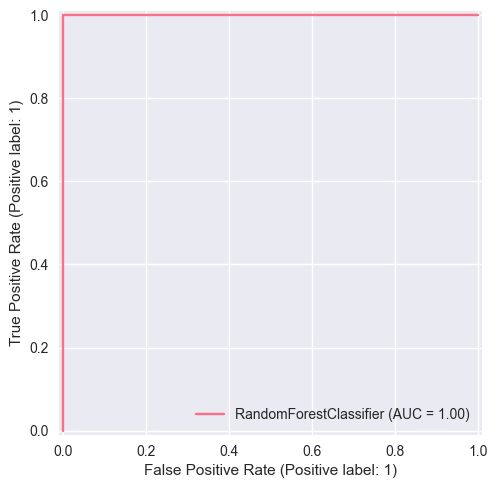

In [95]:
from sklearn.metrics import RocCurveDisplay
# les courbes AUC et le SCORE_IC pour train
RocCurveDisplay.from_estimator(rf, X_train,y_train)

In [98]:
#sauvegarde du modèle
pickle.dump(rf, open('random_forest_model.pkl', 'wb'))


CE QUI TERMINE NOTRE NOTEBOOK.
                                   MERCI :)